# Рынок заведений общесвтенного питания Москвы 2025

**Описание проекта**

Вы решили открыть небольшое кафе в Москве. Вы решили обратиться к инвесторам. Чтобы их заинтересовать Вам необходимио рассказать про текущую обстановку на рынке заведений.

**Цели**

- Анализ рынка заведений общественного питания Москвы
- Выявить наиболее выгодное(ые) местоположение (местоположения)
- Составление презентации для инвесторов

**Задачи**
- Сбор данных
- Предобработка и подготовка данных к анализу
- Анализ ключевых аспектов рынка: 
  - типы заведений
  - Типы ритейла
  - Вместительность заведений
  - Расположение заведений общественного питания
 - Определение выгодных местоположений, типа заведения и вместительности
 - Презентация для инвесторов

## Сбор данных

**Для работы был взят файл с "Портала открытых данных Правительства Москвы"**
 - `https://data.mos.ru/opendata/1903?isDynamic=false` - файл с заведениями
 - `https://docs.google.com/spreadsheets/d/1SsglWS93TLmyoe_PHeUOTZTyPrj7zI-NccEIz5nPYUQ/edit?usp=sharing` - файл с адресами и относящимся к ним районам и округам

## Предобработка и подготовка данных к анализу

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set(style="dark")

In [2]:
rest_temp = pd.read_csv('MSK.csv', sep=';')

In [723]:
rest_temp = rest_temp.iloc[1:]

In [724]:
rest = rest_temp[['ID', 'Name', 'IsNetObject', 'TypeObject', 'Address', 'SeatsCount']]


In [725]:
rest = rest.rename(columns={'ID': 'id', 
               'Name': 'object_name',
               'IsNetObject': 'chain',
               'TypeObject': 'object_type', 
               'Address': 'address', 
               'SeatsCount': 'seats'})

In [726]:
rest.head()

,id,object_name,chain,object_type,address,seats
1,000077874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,000024309,Кафе «Академия»,нет,ресторан,"Российская Федерация, город Москва, внутригоро...",95
3,000027429,ГБОУ «Школа № 1430 имени Героя Социалистическо...,нет,столовая,"Российская Федерация, город Москва, внутригоро...",240
4,00148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
5,000023394,Кафе Гогиели,нет,кафе,"Российская Федерация, город Москва, внутригоро...",24


In [727]:
rest.shape

(22505, 6)

In [728]:
rest.dtypes

id             object
object_name    object
chain          object
object_type    object
address        object
seats          object
dtype: object

In [729]:
rest['id'] = rest['id'].astype(int)  
rest['seats'] = rest['seats'].astype(int)  

In [730]:
rest.dtypes

id              int64
object_name    object
chain          object
object_type    object
address        object
seats           int64
dtype: object

In [731]:
# обзор данных
display(rest.info())
print('Пропуски в данных:')
print(rest.isnull().sum())
print('Полностью дублированных строк:')
print(rest.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22505 entries, 1 to 22505
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           22505 non-null  int64 
 1   object_name  22505 non-null  object
 2   chain        22505 non-null  object
 3   object_type  22505 non-null  object
 4   address      22505 non-null  object
 5   seats        22505 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.0+ MB


None

Пропуски в данных:
id             0
object_name    0
chain          0
object_type    0
address        0
seats          0
dtype: int64
Полностью дублированных строк:
0


Таблица `rest`:
- `id` - идентификатор объекта общественного питания
- `object_name` — название объекта общественного питания;
- `chain` — сетевой ресторан;
- `object_type` — тип объекта общественного питания;
- `address` — адрес;
- `seats` — количество посадочных мест.

**Данные подготовлены к дальнейшему анализу**

## Анализ ключевых аспектов рынка
### типы заведений

In [732]:
gr_1 = rest.groupby('object_type')['id'].count().reset_index().sort_values(by='id', ascending=False).rename(columns={'id': 'count'})

In [733]:
gr_1

,object_type,count
4,кафе,8055
8,предприятие быстрого обслуживания,3938
9,ресторан,2694
5,кафетерий,2465
10,столовая,2080
0,бар,1503
3,закусочная,643
6,магазин (отдел кулинарии),445
1,буфет,406
2,заготовочный цех,192


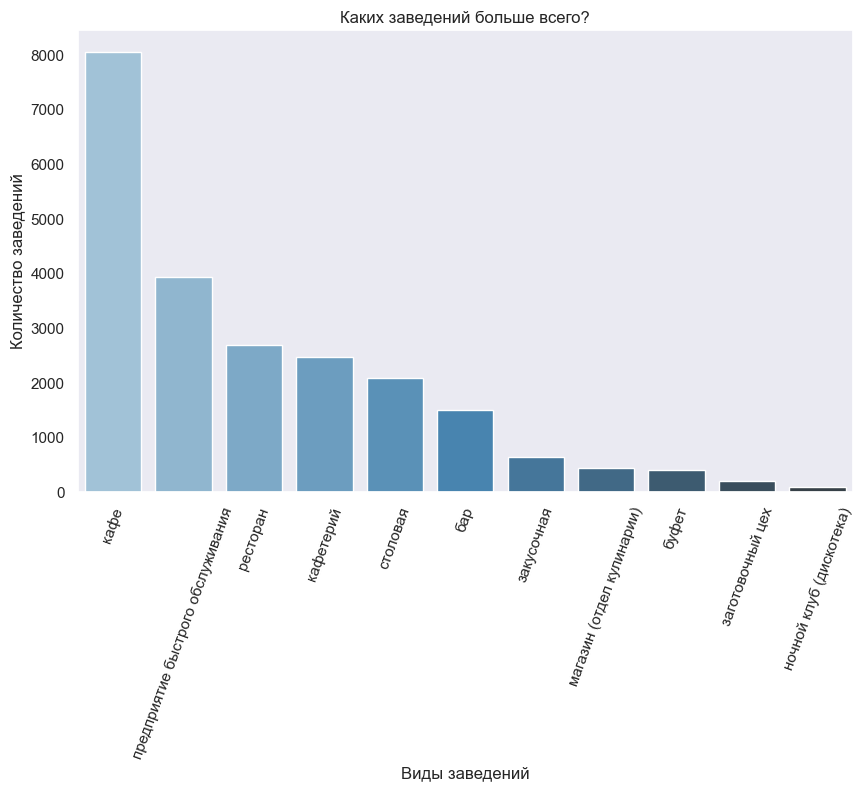

In [734]:
plt.figure(figsize=(10, 6))
a1 = sns.barplot(x="object_type", y="count", data=gr_1,  palette="Blues_d", hue="object_type")
plt.title('Каких заведений больше всего?') 
plt.xlabel('Виды заведений')
plt.ylabel('Количество заведений')
plt.xticks(rotation=70) #поворот названий колонок
plt.show()

 - Согласно графику на рынке преобладает тип "кафе". При чем кафе является подавляющим большинством.
 - На 2 месте расположился фастфуд.
 - На 3 рестораны.
 - На 4 месте с небольшой разницей кафетерии.
 - Заключает 5 самых популярных заведений - столовая.
 - Меньше всего представлено ночных клубов.

### Типы ритейла

In [735]:
gr_2 = rest.pivot_table(columns='chain', values='id', aggfunc='count').rename(columns={'да': 'Сетевое', 'нет': 'Несетевое'})

In [736]:
gr_2

chain,Сетевое,Несетевое
id,4113,18392


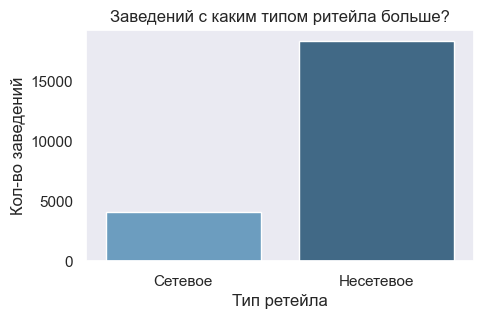

In [737]:
plt.figure(figsize=(5, 3))
a2 = sns.barplot(data=gr_2, palette="Blues_d")
plt.title('Заведений с каким типом ритейла больше?') 
plt.xlabel('Тип ретейла')
plt.ylabel('Кол-во заведений')
plt.show()

 - Согласно графику неcетевые заведения преобладают над сетевыми в 4 раза.

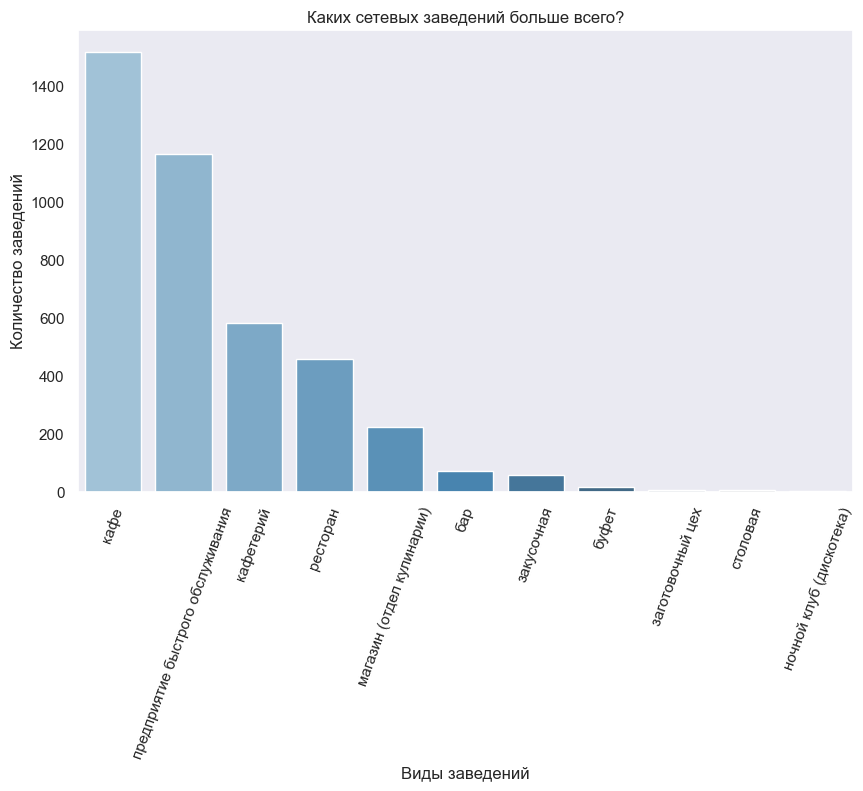

In [738]:
gr_3 = rest.query('chain == "да"').groupby('object_type')['id']. \
    count().reset_index().sort_values(by='id', ascending=False). \
    rename(columns={'id': 'count'})

plt.figure(figsize=(10, 6))
a3 = sns.barplot(x="object_type", y="count", data=gr_3,  palette="Blues_d", hue="object_type")
plt.title('Каких сетевых заведений больше всего?') 
plt.xlabel('Виды заведений')
plt.ylabel('Количество заведений')
plt.xticks(rotation=70) #поворот названий колонок
plt.show()

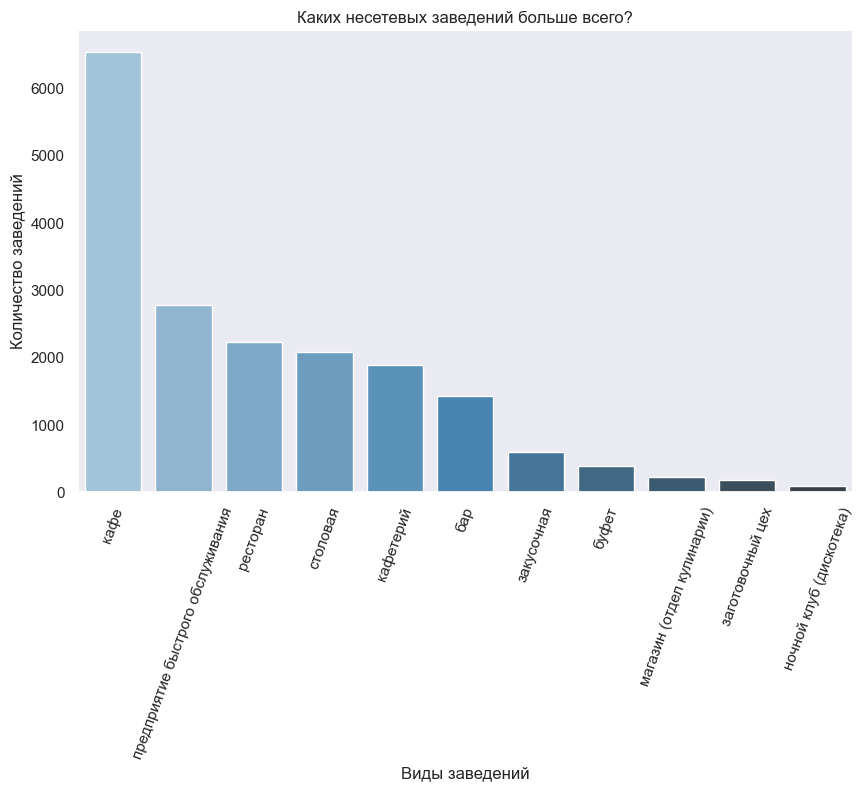

In [739]:
gr_3 = rest.query('chain == "нет"').groupby('object_type')['id']. \
    count().reset_index().sort_values(by='id', ascending=False). \
    rename(columns={'id': 'count'})

plt.figure(figsize=(10, 6))
a3 = sns.barplot(x="object_type", y="count", data=gr_3,  palette="Blues_d", hue="object_type")
plt.title('Каких несетевых заведений больше всего?') 
plt.xlabel('Виды заведений')
plt.ylabel('Количество заведений')
plt.xticks(rotation=70) #поворот названий колонок
plt.show()

 - В каждом типе ритейла преобладает кафе.
 - В сетевом также стоит обратить внимание на фастфуд.
 - В несетевом - на столовые (разница в сетевых и несетевых очень значительна).

### Вместительность заведений

In [740]:
gr_4 = rest.query('chain == "да"').groupby('object_name').agg({'id':'count', 'seats':'mean'}).sort_values(by='id', ascending = False)

In [741]:
gr_4.head(10)

,id,seats
object_name,,
Буханка,292,9.044521
Милти,228,2.122807
Вкусно - и точка,212,79.957547
Cofix,192,6.364583
Бургер Кинг,181,42.005525
KFC,170,49.164706
Шоколадница,165,52.460606
Теремок,141,25.907801
Крошка Картошка,136,16.073529


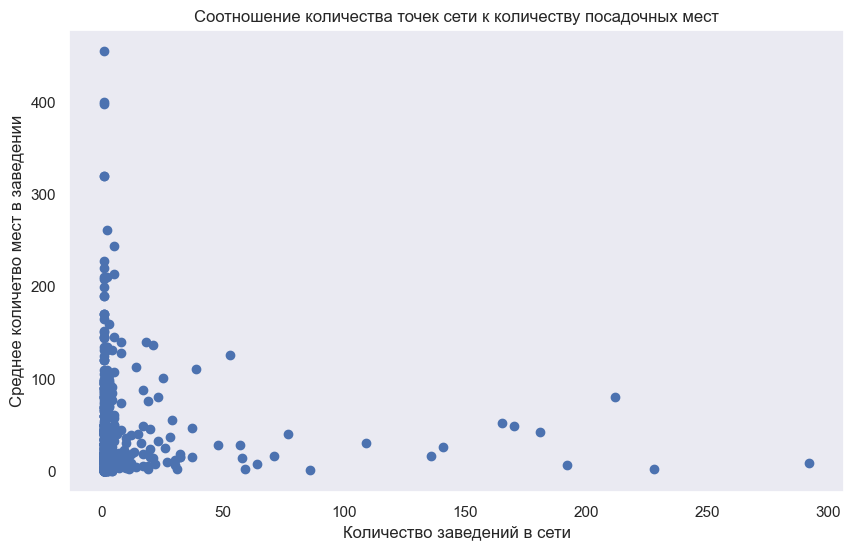

In [742]:
plt.figure(figsize=(10, 6))
a4 = plt.scatter(x="id", y="seats", data=gr_4)
plt.title('Соотношение количества точек сети к количеству посадочных мест') 
plt.xlabel('Количество заведений в сети')
plt.ylabel('Среднее количетво мест в заведении')
plt.show()

Теперь посмотрим на соотношение только для кафе.

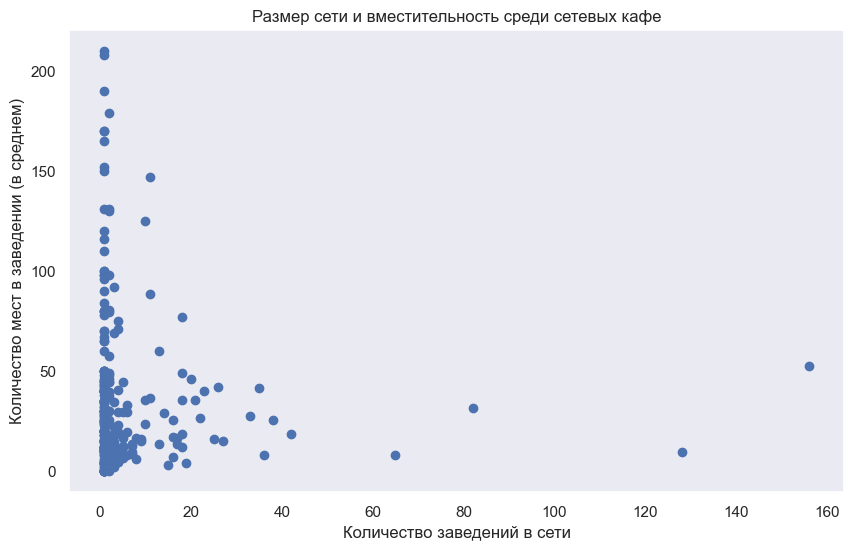

In [743]:
cafe = rest.query('chain == "да" & object_type == "кафе"').groupby('object_name').agg({'id':'count', 'seats':'mean'}).sort_values(by='id', ascending = False)
plt.figure(figsize=(10, 6))
a4 = plt.scatter(x="id", y="seats", data=cafe)
plt.title('Размер сети и вместительность среди сетевых кафе') 
plt.xlabel('Количество заведений в сети')
plt.ylabel('Количество мест в заведении (в среднем)')
plt.show()

In [744]:
print('Среднее количество посадочных мест в кафе:', cafe['seats'].mean().round(2))
print('Среднее количество точек в сети кафе', cafe['id'].mean().round(2))

Среднее количество посадочных мест в кафе: 35.88
Среднее количество точек в сети кафе 5.74


#### Cоотношение количеста точек сети с их вместительностью

- Сетевые заведения в Москве чаще всего имеют до 20 точек. 
- Для большей части характерно количество посадочных мест до 100 человек. Больше уже более редкие случаи.
- В основном можно говорить, что чем меньше точек у заведения, тем большую вместительность заведения сети имеют. 
- Для "гигантов", имеющих более 20-ти точек по Москве характерна вместительность заведений не более 100 человек.

Для кафе:

- Для сетевых кафе с небольшой вместительностью (36 посадочных мест) каждой кофейни сеть в основном до 20 точек.

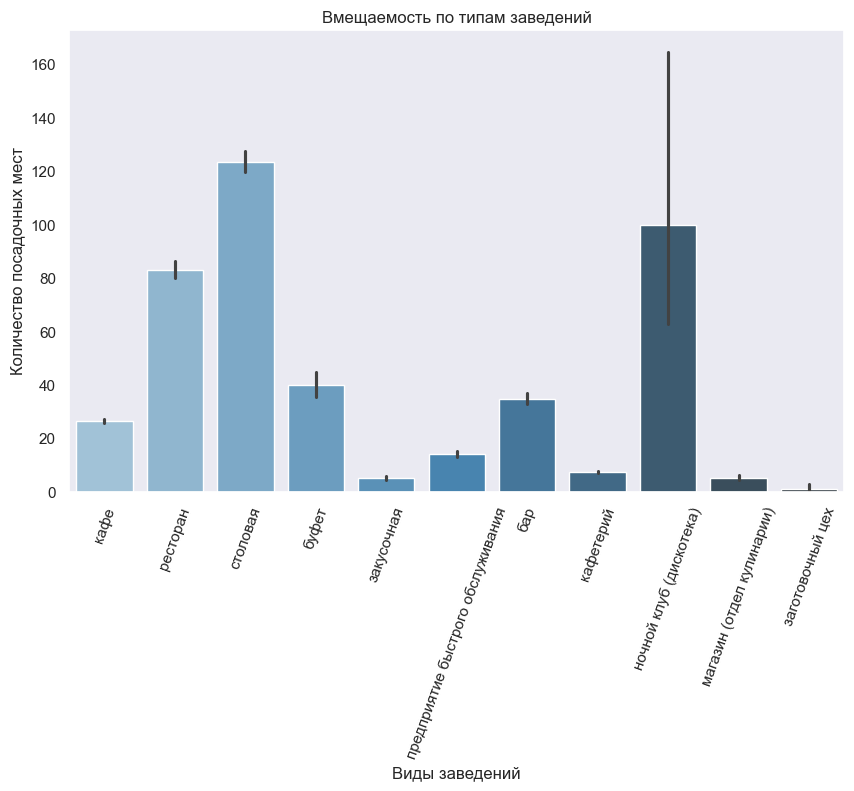

In [745]:
# Вмещаемость по типам заведений
plt.figure(figsize=(10, 6))
a5 = sns.barplot(x="object_type", y="seats", data=rest,  palette="Blues_d", hue="object_type")
plt.title('Вмещаемость по типам заведений') 
plt.xlabel('Виды заведений')
plt.ylabel('Количество посадочных мест')
plt.xticks(rotation=70)
plt.show()

- Наибольшая вместительность среди имеющихся заведений у столовых, ресторанов и ночных клубов.
- У преобладающих на рынке видов заведений общественного питания (кафе и фастфуд) посадочных мест не так много, около 20. 
- Наименьшее количество посадочных мест предоставляют отделы кулинарии, кафетерии и закусочные.

### Расположение заведений общественного питания

Для запуска удачного заведения общественного питания стоит найти удачное расположение. Найдем округа, районы и улицы наиболее благоприятных для размещения заведения.

In [746]:
# Добавим колонку 'street', содержащую только улицу
import pandas as pd
import re
rest['address'] = rest['address'].str.replace('Российская Федерация, ', '', regex=False)
rest['address'] = rest['address'].str.replace(r'внутригородская территория муниципальный округ [^,]+,?\s*', '', regex=True)
rest['street'] = rest['address'].str.replace('город Москва, ', '', regex=False)
def remove_house_number(address):
    patterns = [
        r'(?:дом|д\.|строение)\s*\S+',  # "дом 15", "д.25", "строение7А"
        r'(?:корпус|корп\.)\s*\S+',      # "корпус 2", "корп.5"
        r'\b\d+\s*/\s*\d+\b',             # "34/1", "100 / 2"
        r',\s*\d+\s*$'                    # ", 100" в конце строки
    ]

    for pattern in patterns:
        address = re.sub(pattern, '', address)
    
    # Удаляем лишние запятые и пробелы
    address = re.sub(r',\s+,', ', ', address)  # Исправляет двойные запятые
    address = re.sub(r'\s+,', ',', address)    # Убирает пробелы перед запятой
    address = address.strip(' ,')              # Убирает запятые/пробелы в начале/конце
    return address

# Применяем функцию
rest['street'] = rest['street'].apply(remove_house_number)
rest.head()

,id,object_name,chain,object_type,address,seats,street
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,ресторан,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,27429,ГБОУ «Школа № 1430 имени Героя Социалистическо...,нет,столовая,"город Москва, Угличская улица, дом 17",240,Угличская улица
4,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,переулок Сивцев Вражек
5,23394,Кафе Гогиели,нет,кафе,"город Москва, Авиамоторная улица, дом 49/1",24,Авиамоторная улица


In [747]:
# подгружает табличку с адресами и названиями районов и округов
distinct = pd.read_csv('MSK_okruga.csv')
distinct.head()

,address,area,district
0,"город Москва, Варшавское шоссе, дом 150, строе...",Южный административный округ,муниципальный округ Чертаново Южное
1,"город Москва, Косинская улица, дом 26А",Восточный административный округ,муниципальный округ Вешняки
2,"город Москва, Гороховский переулок, дом 21",Центральный административный округ,муниципальный округ Басманный
3,"город Москва, Тагильская улица, дом 4, строени...",Восточный административный округ,муниципальный округ Метрогородок
4,"город Москва, Ленинградский проспект, дом 73А,...",Северный административный округ,муниципальный округ Сокол


In [748]:
# Объединим таблицы по адресу
rest_full = rest.merge(distinct, on = 'address', how='left') 
rest_full.head()

,id,object_name,chain,object_type,address,seats,street,area,district
0,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,NaN,NaN
1,24309,Кафе «Академия»,нет,ресторан,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица,Центральный административный округ,муниципальный округ Таганский
2,27429,ГБОУ «Школа № 1430 имени Героя Социалистическо...,нет,столовая,"город Москва, Угличская улица, дом 17",240,Угличская улица,Северо-Восточный административный округ,муниципальный округ Лианозово
3,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,переулок Сивцев Вражек,Центральный административный округ,муниципальный округ Арбат
4,23394,Кафе Гогиели,нет,кафе,"город Москва, Авиамоторная улица, дом 49/1",24,Авиамоторная улица,Юго-Восточный административный округ,муниципальный округ Лефортово


In [749]:
count_in_street = rest_full.groupby('street')['id'].count().reset_index().sort_values(by='id', ascending=False)
count_in_street.head(10) # топ 10 улиц с заведениями

,street,id
2026,проспект Мира,304
775,Ленинградский проспект,293
2017,проспект Вернадского,239
1150,Профсоюзная улица,230
440,Варшавское шоссе,219
782,Ленинский проспект,214
1130,Пресненская набережная,209
560,Дмитровское шоссе,195
2013,проспект Андропова,185
1707,город Зеленоград,178


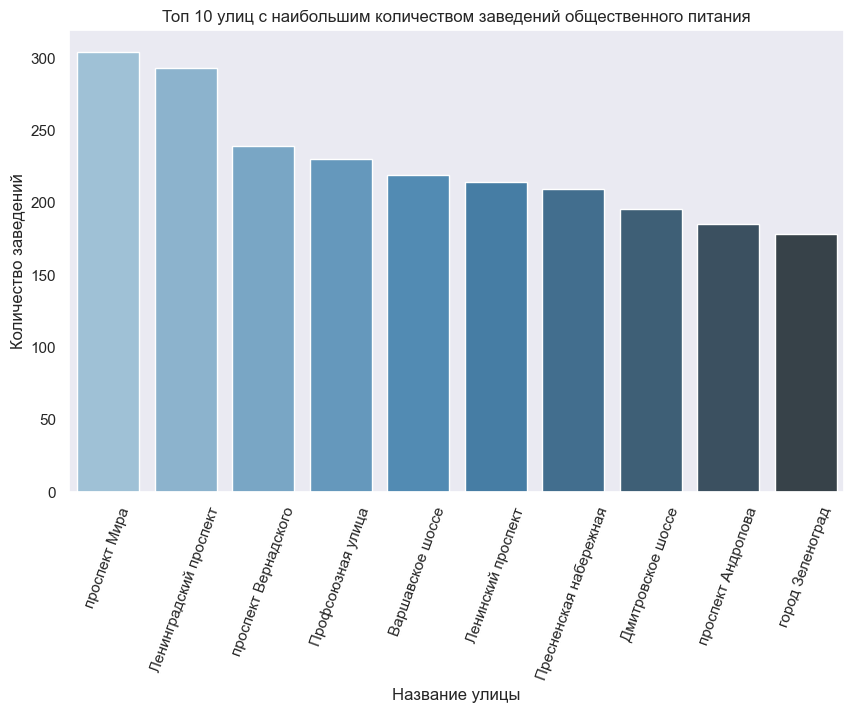

In [750]:
plt.figure(figsize=(10, 6))
a6 = sns.barplot(x="street", y="id", data=count_in_street.head(10),  palette="Blues_d", hue="street")
plt.title('Топ 10 улиц с наибольшим количеством заведений общественного питания') 
plt.xlabel('Название улицы')
plt.ylabel('Количество заведений')
plt.xticks(rotation=70) 
plt.show()

In [751]:
# Соберем полную таблицу только из улиц, вошедших в топ-10
count_in_street = rest.groupby('street')['id'].count().reset_index().sort_values(by='id', ascending=False).rename(columns={'id':'count'})
count_in_street_and_district = pd.merge(count_in_street, rest_full, on='street', how='left')
count_in_street_and_district = count_in_street_and_district[['street', 'district', 'area', 'count']].drop_duplicates()
# count_in_street_and_district - список улиц и рацонов и округов в которые они входят

In [752]:
top_streets = set(count_in_street['street'].head(10)) # список из топ 10 улиц 
street_district_count = count_in_street_and_district[count_in_street_and_district['street'].map(lambda x: x in top_streets)]
# street_district_count - список топ 10 улиц с районами и округами, в которых находятся 

In [753]:
district_count = rest_full.groupby('district')['id'].count().reset_index().sort_values(by='id', ascending=False)
district_count.head(10) # топ 10 самых популярных районов Москвы

,district,id
120,муниципальный округ Тверской,981
100,муниципальный округ Пресненский,847
26,муниципальный округ Басманный,832
45,муниципальный округ Даниловский,571
49,муниципальный округ Замоскворечье,486
127,муниципальный округ Хамовники,464
77,муниципальный округ Мещанский,449
60,муниципальный округ Красносельский,406
119,муниципальный округ Таганский,405
23,муниципальный округ Арбат,266


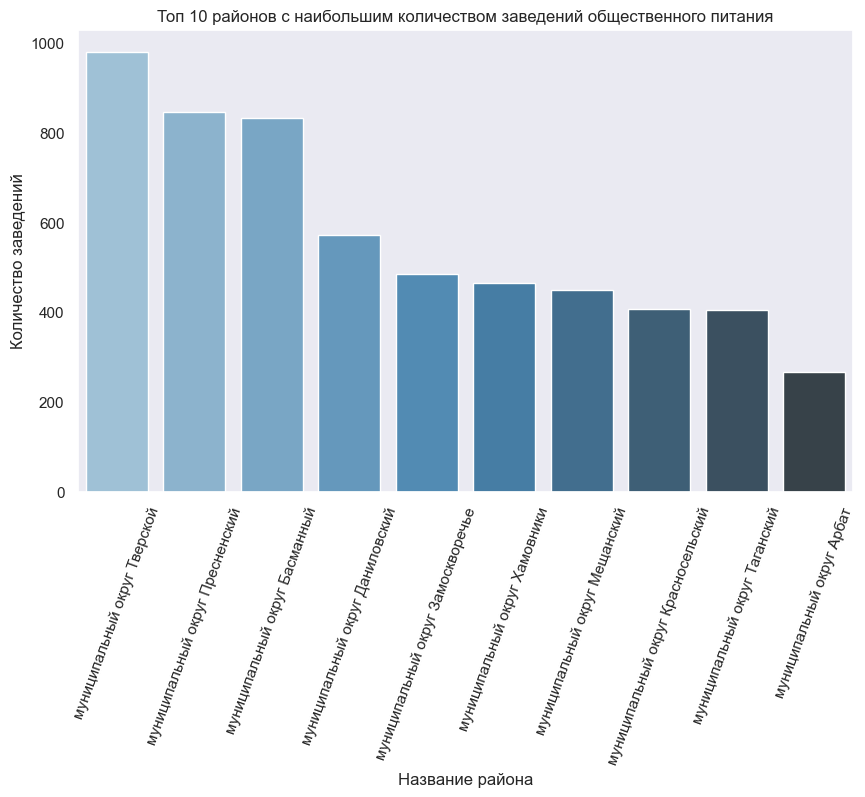

In [754]:
plt.figure(figsize=(10, 6))
a6 = sns.barplot(x="district", y="id", data=district_count.head(10),  palette="Blues_d", hue="district")
plt.title('Топ 10 районов с наибольшим количеством заведений общественного питания') 
plt.xlabel('Название района')
plt.ylabel('Количество заведений')
plt.xticks(rotation=70) 
plt.show()

In [755]:
area_count = rest_full.groupby('area')['id'].count().reset_index().sort_values(by='id', ascending=False)
area_count.head(10) # топ 10 самых популярных округов Москвы (из 12)

,area,id
8,Центральный административный округ,5348
11,Южный административный округ,2183
4,Северный административный округ,1838
5,Северо-Восточный административный округ,1766
1,Западный административный округ,1625
10,Юго-Западный административный округ,1500
0,Восточный административный округ,1476
9,Юго-Восточный административный округ,1148
6,Северо-Западный административный округ,987
2,Зеленоградский административный округ,272


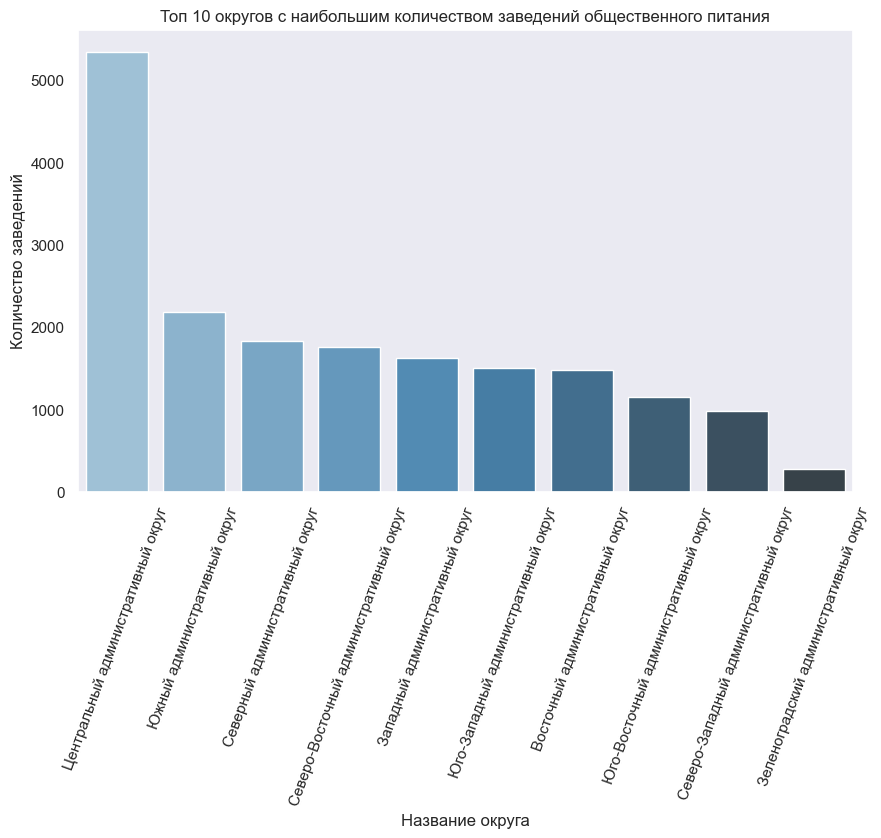

In [756]:
plt.figure(figsize=(10, 6))
a6 = sns.barplot(x="area", y="id", data=area_count.head(10),  palette="Blues_d", hue="area")
plt.title('Топ 10 округов с наибольшим количеством заведений общественного питания') 
plt.xlabel('Название округа')
plt.ylabel('Количество заведений')
plt.xticks(rotation=70) 
plt.show()

## Определение выгодных местоположений, типа заведения и вместительности

In [757]:
street_district_count.query('area == "Центральный административный округ"') 

,street,district,area,count
0,проспект Мира,муниципальный округ Мещанский,Центральный административный округ,304
1299,Ленинский проспект,муниципальный округ Якиманка,Центральный административный округ,214
1499,Пресненская набережная,муниципальный округ Пресненский,Центральный административный округ,209


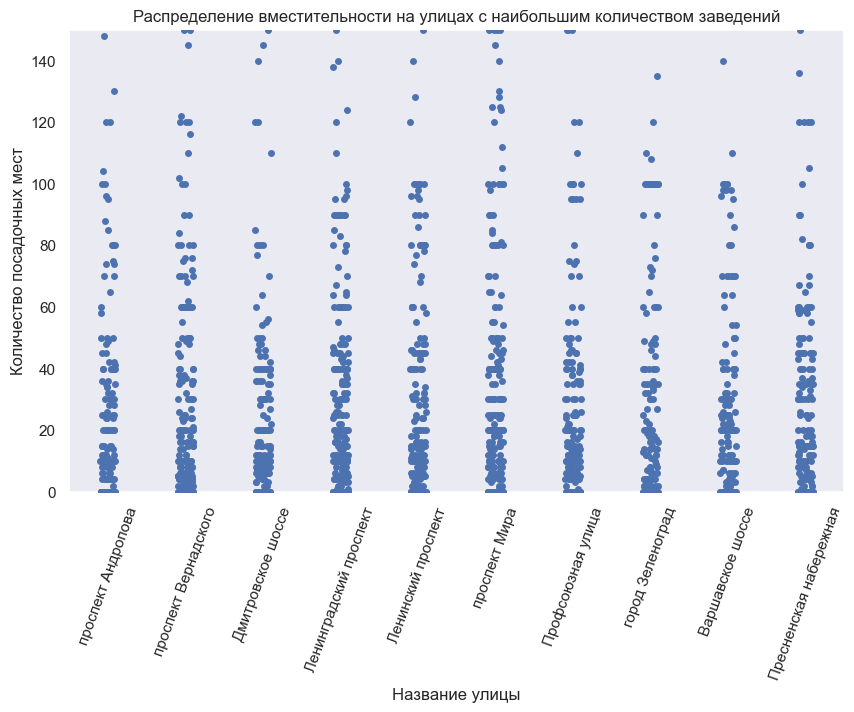

In [758]:
plt.figure(figsize=(10, 6))
sns.stripplot(x="street", y="seats", data=rest_full.query('street in @top_streets'))
plt.ylim(0, 150)
plt.title('Распределение вместительности на улицах с наибольшим количеством заведений') 
plt.xlabel('Название улицы')
plt.ylabel('Количество посадочных мест')
plt.xticks(rotation=70) 
plt.show()

#### Выбор местоположения
 - Улица, на которой больше всего заведений - **проспект Мира**
 - Район, на котором больше всего заведений - **Тверской**
 - Округ, в котором больше всего заведений - **Центральный**

Так как центральный район занял лидирующее место с отрывом и отталкиваясь от того, что центральная часть Москвы самая популярная как в будние, так и в выходные, как в дневное, так и в вечернее время, то можно рассмотреть улицы, на которых больш всего зведений и находятся в центральном районе. А это **часть проспекта Мира, находящаяся в Мещанском районе** и **Пресненская набережная**.

#### Выбор типа заведения
 - Стоит учитывать, что Мы собираемся открывать свое первое заведение, значит оно будет являться **несетевым**. Как Мы рассмотрели выше, самое популярное заведение - **кафе**.
 - Также достаточно много фастфудов и ресторанов.
 - 
#### Выбор вместительности
 - Необходимо обратить внимание на вместительность определенной локации.
 - Разумным решением было бы держаться около средних значений для каждого типа заведения:
    - кафе - в среднем **25-30**.
    - фастфуд - в среднем **20**.
    - ресторан - в среднем **80**.   

## Презентация для инвесторов
https://disk.yandex.ru/i/yzTL4jO0dt9fVg